# STAT 207 Lab Assignment 2 - Individual Part - [25 total points]

## Dataframe Manipulation,  Cleaning, and Numerical Variable Descriptive Analytics

Due: Tuesday, September 7, 11:59pm CST

<hr>


## <u>Case Study</u>: Steam Game Play and Purchase Analysis
Steam is the world's most popular PC Gaming hub. With a massive collection that includes everything from AAA blockbusters to small indie titles, great discovery tools can be super valuable for Steam. What can we learn about Steam gaming behavior?

The dataset we will be analyzing is comprised of a random sample of 500 steam users and their game play and purchase behaviors. It has the following columns:
* user_id
* game_name,
* activity:
    - purchase: indicating that the user has *purchased* the corresponding game
    - play: indicating that the user has *played* the corresponding game (for at least some amount of time.) 
* hours_played_if_play:
    - if the row corresponds to a 'play' activity, this number represents the number of hours the user has played the game
    - if the row corresponds to a 'purchase' activity, this number is always a 1 (and means nothing... it's a placeholder).

<hr>

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 1. Read the csv [0.5 pt]
First, read the steam_sample.csv file into a dataframe and display the first five rows of the dataframe.

In [4]:
df=pd.read_csv('steam_sample.csv')
df.head()

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1
1,308653033,Unturned,play,0.6
2,308653033,theHunter,purchase,1
3,144004384,Dota 2,purchase,1
4,144004384,Dota 2,play,22


### 2. How many rows does the dataframe have? (Use Python code to show this). [1 pt]

In [5]:
df.shape

(7806, 4)

### 3. Data cleaning and data type checking [4 pt]

We plan to analyze the "hours_played_if_play" variable in this assignment. In order to ensure that our subsequent functions work appropriately on these variables, you should do the following.
1. Identify any values (if any) that have been encoded in the csv to represent a **missing value**. 
2. Make sure that the values in your "hours_played_if_play" variable are represented as numerical values (either float64 or int64 object types). If not, fix this using the methods we discussed in class.
3. Delete any rows in your dataframe that have missing values. Remember, some "missing values", in the way that they're currently encoded in the csv may not be initially detectable by Python. It is your job to figure out what these missing values are and make it so Python does detect them. And then delete them.

In [6]:
#1.
df.isna()

,user_id,game_name,activity,hours_played_if_play
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
7801,False,False,False,False
7802,False,False,False,False
7803,False,False,False,False
7804,False,False,False,False


In [7]:
#2.
df.dtypes

user_id                  int64
game_name               object
activity                object
hours_played_if_play    object
dtype: object

In [8]:
df['hours_played_if_play'].unique()

array(['1', '0.6', '22', '1028', '1008', '148', '108', '72', '36', '35',
       '32', '21', '16', '15.8', '8.6', '7.8', '7.3', '3.1', '1.9', '1.7',
       '1.1', '0.4', '153', '63', '26', '1.4', '639', '479', '70', '65',
       '33', '30', '19.8', '16.2', '11.3', '4.2', '3.9', '2.3', '0.8',
       '0.7', '0.5', '0.3', '396', '227', '13.4', '12.6', '11.2', '10.1',
       '2.4', '210', '1.2', '0.2', '13.2', '48', '110', '0.1', '67',
       '429', '5.5', '61', '1.6', '18.3', '9.9', '4.7', '1714', '441',
       '197', '147', '117', '86', '73', '49', '46', '31', '24', '20',
       '19.7', '18.2', '14.2', '11.6', '9.8', '9.7', '8.4', '6.5', '4.8',
       '4.1', '3.7', '2.9', '2.7', '2.1', '222', 'unknown', '14.9',
       '14.1', '83', '11.1', '3.2', '6.9', '395', '251', '9.3', '7.4',
       '54', '34', '1.8', '99', '98', '96', '29', '27', '23', '19.1',
       '18.7', '17.5', '17', '16.6', '14.7', '13.3', '10.7', '10.2', '10',
       '9.6', '9.5', '8', '7.9', '7.6', '7', '6.6', '6', '5.8', '5

In [9]:
missing_values = ["unknown"]
df = pd.read_csv('steam_sample.csv', na_values=missing_values)
df.dtypes

user_id                   int64
game_name                object
activity                 object
hours_played_if_play    float64
dtype: object

In [10]:
#3.
df.isna().sum()

user_id                 0
game_name               0
activity                0
hours_played_if_play    6
dtype: int64

In [11]:
df=df.dropna()

### 4. New dataframe [1 pt]

How many rows with missing values did you delete from your original dataframe?

In [12]:
df.shape
7806-7800

6

### 5. Separate the dataframe. [3 pt]

Next, in this analysis we would like to analyze the game purchase information and game play information separately. First create two new dataframes:
* one that is comprised of the purchase rows
* the other that is comprised of the play rows.

In [13]:
p_df=df[df['activity']=='purchase']
p_df.head()

,user_id,game_name,activity,hours_played_if_play
0,308653033,Unturned,purchase,1.0
2,308653033,theHunter,purchase,1.0
3,144004384,Dota 2,purchase,1.0
5,54103616,Counter-Strike Global Offensive,purchase,1.0
7,54103616,Counter-Strike,purchase,1.0


In [14]:
pl_df=df[df['activity']=='play']
pl_df.head()

,user_id,game_name,activity,hours_played_if_play
1,308653033,Unturned,play,0.6
4,144004384,Dota 2,play,22.0
6,54103616,Counter-Strike Global Offensive,play,1028.0
8,54103616,Counter-Strike,play,1008.0
10,54103616,Left 4 Dead,play,148.0


### 6. Sorting the dataframe [2 pt]

Next, sort the play dataframe by the number of game hours played in descending order.

In [15]:
pl_df_sorted = pl_df.sort_values(by='hours_played_if_play', ascending=False)

### 7. Analyzing Hours Played

#### 7.1. Histogram [2 pt]
Next, we would like to learn more about the total amount of hours played by each user for each game in our 'play dataframe.' First, create a **relative frequency** histogram of this variable.

/Users/fandazhong/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_played_if_play', ylabel='Density'>

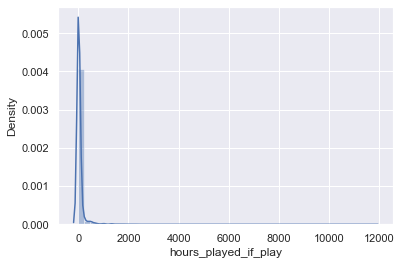

In [16]:
sns.distplot(pl_df['hours_played_if_play'])

#### 7.2. Measures of Center and Spread [2.5 pt]

Calculate a measure of center for this numerical variable and a measure of spread for this numerical variable that would be the *most suitable* for describing this particular numerical variable. Explain why you chose these particular summary statistics to describe the variable over other ones.

In [17]:
pl_df['hours_played_if_play'].median()

5.1

In [18]:
print("First quartile (Q1) =", pl_df['hours_played_if_play'].quantile(q=0.25))
print("Third quartile (Q3) =", pl_df['hours_played_if_play'].quantile(q=0.75))

First quartile (Q1) = 1.1
Third quartile (Q3) = 22.0


In [26]:
22-1.1

20.9

# Because it shows a skewed line, the median is closer to the center than the mean value. Therefore, we should also use quartiles to calculate the interquartile range. The interquartile range is 20.9

### 8. Selecting a High Game Play Row [2 pt]

Extract just the row (ie. user and game combination) that has the **sixth highest** amount of total hours played in the dataset.

In [19]:
pl_df_sorted.iloc[0:6,:]

,user_id,game_name,activity,hours_played_if_play
5106,73017395,Sid Meier's Civilization V,play,11754.0
531,32749624,Counter-Strike,play,4814.0
1592,43684632,Counter-Strike Global Offensive,play,3626.0
769,99077905,Dota 2,play,3309.0
4278,48798067,Mount & Blade Warband,play,3178.0
5463,39911920,Counter-Strike,play,2258.0


### 9. Selecting a Typical Game Play Row(s) [3 pt]

Next, let's select the row(s) from this dataset that represent a "typical" length of time playing a game. Below, extract all of the rows (ie. user and game combinations) that have the **median** amount of total hours played in the dataset.

Then sort it alphabetically by the game name.

**To get full credit, you must do this all in one line of code!**

In [20]:

pl_df[pl_df['hours_played_if_play']==pl_df['hours_played_if_play'].median()].sort_values(by='game_name')

,user_id,game_name,activity,hours_played_if_play
5513,14962163,Batman Arkham City GOTY,play,5.1
1467,47164966,Day of Defeat,play,5.1
7735,75970863,Diner Dash Hometown Hero,play,5.1
4558,48798067,Gothic II Gold Edition,play,5.1
6087,214619754,H1Z1,play,5.1
863,99077905,L.A. Noire,play,5.1
5038,113546110,Loadout,play,5.1
861,99077905,Mirror's Edge,play,5.1
4554,48798067,Mirror's Edge,play,5.1
1728,43684632,Sid Meier's Pirates!,play,5.1


### 10. Learning More about the Users 

We would like to learn more about the user that we selected in question 8, who obviously like to play at least some games for quite a long amount of time.

#### 10.1. [2 pt] For the user that we selected in question 8 display all of the games that they have played and all of the games that they have purchased. 

In [21]:
top_six=pl_df_sorted.iloc[0:6,:]
top_six

,user_id,game_name,activity,hours_played_if_play
5106,73017395,Sid Meier's Civilization V,play,11754.0
531,32749624,Counter-Strike,play,4814.0
1592,43684632,Counter-Strike Global Offensive,play,3626.0
769,99077905,Dota 2,play,3309.0
4278,48798067,Mount & Blade Warband,play,3178.0
5463,39911920,Counter-Strike,play,2258.0


In [22]:
df[df['user_id'].isin(top_six['user_id'])]

,user_id,game_name,activity,hours_played_if_play
530,32749624,Counter-Strike,purchase,1.0
531,32749624,Counter-Strike,play,4814.0
532,32749624,Counter-Strike Global Offensive,purchase,1.0
533,32749624,Counter-Strike Global Offensive,play,117.0
534,32749624,Garry's Mod,purchase,1.0
...,...,...,...,...
5465,39911920,Counter-Strike Condition Zero,play,32.0
5466,39911920,Counter-Strike Condition Zero Deleted Scenes,purchase,1.0
5467,39911920,Day of Defeat,purchase,1.0
5468,39911920,Deathmatch Classic,purchase,1.0


#### 10.2. [2 pt] Use Python to find the percentage of games that this user purchased that they *actually played*.

(Hint: We can index the output of the **.shape** attribute like a list. For instance, in the dataframe below demo_df.shape[0] extracts the number of rows in the dataframe and demo_df.shape[1] extracts the number of columns in the dataframe.

**To get full credit you should do this in only one line of code!**

In [23]:
#Tutorial
import pandas as pd
demo_df=pd.DataFrame({'a': [1,2,3], 'b': [4,5,6]})
demo_df

,a,b
0,1,4
1,2,5
2,3,6


In [24]:
#Tutorial
print(demo_df.shape)
print(demo_df.shape[0])
print(demo_df.shape[1])

(3, 2)
3
2


In [25]:
#Your code here
df[df['user_id'].isin(top_six['user_id'])][df[df['user_id'].isin(top_six['user_id'])]['activity']=='play'].shape[0]/df[df['user_id'].isin(top_six['user_id'])].shape[0]


0.3860062893081761